In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
img = cv2.imread(r'image.png')

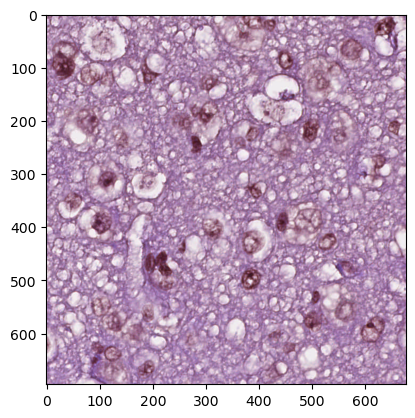

In [3]:
plt.imshow(img)

In [4]:
img_contrast = cv2.detailEnhance(img , 0.01)

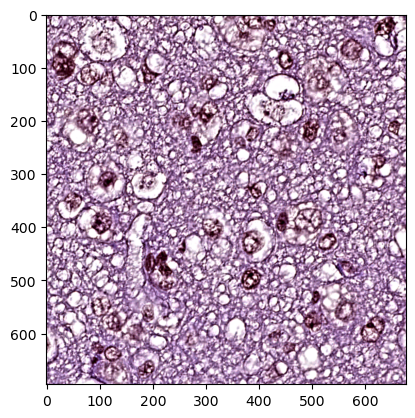

In [5]:
plt.imshow(img_contrast)

In [6]:
enhanced  = cv2.convertScaleAbs(img, alpha=2.5, beta=0)

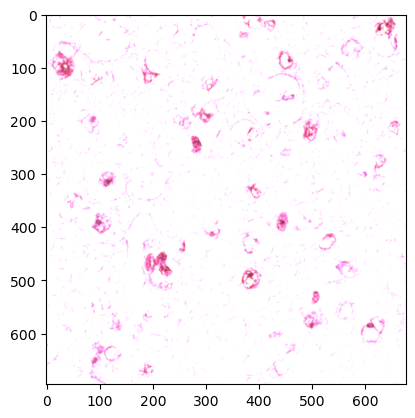

In [7]:
plt.imshow(enhanced)

In [8]:
ret , thr = cv2.threshold(enhanced , 175 , 200 , cv2.THRESH_BINARY)

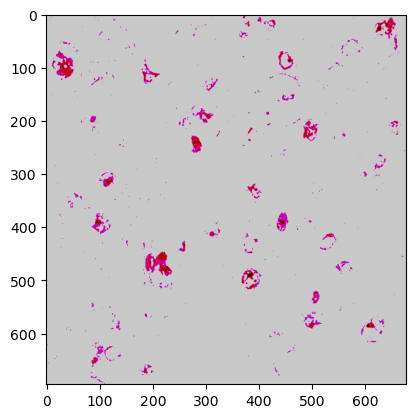

In [9]:
plt.imshow(thr)

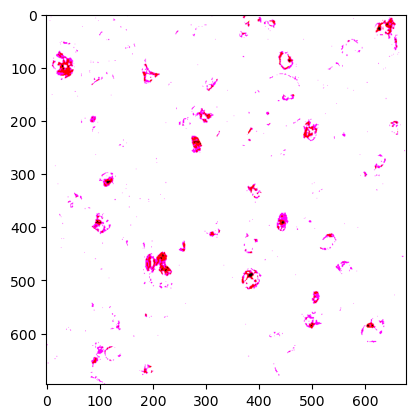

In [10]:
plt.imshow(cv2.convertScaleAbs(thr, alpha=2.5, beta=0))

In [11]:
enh_gr = cv2.cvtColor(cv2.convertScaleAbs(thr, alpha=2.5, beta=0) , cv2.COLOR_RGB2GRAY)
can = cv2.Canny(enh_gr , 100 , 225)

In [12]:
con , hie = cv2.findContours(can , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [13]:
len(con) 

690

In [14]:
colors = [(255 , 255 , 0) , (255 , 0 , 0) , (0 , 0 , 255) , (0 , 255 , 255) , (255 , 0 , 255)]

In [15]:
c = 0

In [16]:
img2 = img

for cont in con:
    cv2.drawContours(img2 , con  , -1  , [0 , 255 , 0])
    c+=1

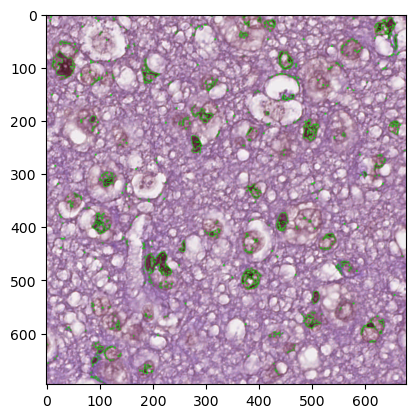

In [17]:
plt.imshow(img2)

In [18]:
for contour in con:
    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Calculate the radius of the circle to cover the contour region
    radius = int(np.sqrt(cv2.contourArea(contour) / np.pi))*2 + 10

    # Draw the circle around the contour
    cv2.circle(img, (cX, cY), radius, colors[c%5], 2)
    c+=1


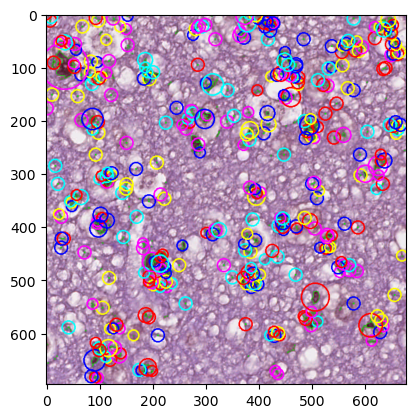

In [19]:
plt.imshow(img)

In [20]:
img3= img.copy()

In [21]:
sorted_contours = sorted(con, key=lambda c: cv2.boundingRect(c)[1])

# Calculate the number of contours to exclude (bottom 30%)
num_to_exclude = int(0.5 * len(sorted_contours))

# Iterate through contours excluding the bottom 30%
for c, contour in enumerate(sorted_contours[:-num_to_exclude]):
    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    radius = int(np.sqrt(cv2.contourArea(contour) / np.pi)) * 2 

    cv2.circle(img3, (cX, cY), radius, colors[c % 5], 2)

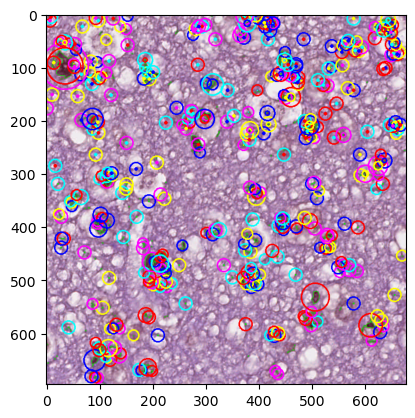

In [22]:
plt.imshow(img3)